# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_GenshinImpact_1.csv")
df.head()

,userName,score,at,content
0,Deny Ardiansyah,5,2024-05-13 02:40:24,Penuh petualang
1,Fitri Rimasari,4,2024-05-13 02:31:11,alur cerita nya menarik event juga sangat mena...
2,Nevin 999,5,2024-05-13 02:20:48,Mantap
3,Muhammad Fikri Deska Masnar,4,2024-05-13 02:08:45,Gamenya menarik dan keren
4,Muhammad Nur adnan,5,2024-05-13 00:57:36,Aduh ini event musiknya saat adanya sudah ke a...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Penuh petualang,Deny Ardiansyah,2024-05-13 02:40:24
1,alur cerita nya menarik event juga sangat mena...,Fitri Rimasari,2024-05-13 02:31:11
2,Mantap,Nevin 999,2024-05-13 02:20:48
3,Gamenya menarik dan keren,Muhammad Fikri Deska Masnar,2024-05-13 02:08:45
4,Aduh ini event musiknya saat adanya sudah ke a...,Muhammad Nur adnan,2024-05-13 00:57:36
...,...,...,...
592,Maaf,Jonathan Sutarman,2024-05-04 12:47:23
593,Saya suka gamenya grafick hd carakter banyak T...,Kamu Nanya,2024-05-04 12:29:11
594,This game is pretty fun to play i cant wait wh...,Eka,2024-05-04 12:23:47
595,Jelek bngt coyyy loading nya lama bngt mending...,Reza Alauna,2024-05-04 12:02:49


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,541,596,596
top,Bagus,Kamu Nanya,2024-05-08 05:24:03
freq,12,2,2


# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(541, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,penuh petualang,Deny Ardiansyah,2024-05-13 02:40:24
1,alur cerita nya menarik event juga sangat mena...,Fitri Rimasari,2024-05-13 02:31:11
2,mantap,Nevin 999,2024-05-13 02:20:48
3,gamenya menarik dan keren,Muhammad Fikri Deska Masnar,2024-05-13 02:08:45
4,aduh ini event musiknya saat adanya sudah ke a...,Muhammad Nur adnan,2024-05-13 00:57:36
...,...,...,...
592,maaf,Jonathan Sutarman,2024-05-04 12:47:23
593,saya suka gamenya grafick hd carakter banyak t...,Kamu Nanya,2024-05-04 12:29:11
594,this game is pretty fun to play i cant wait wh...,Eka,2024-05-04 12:23:47
595,jelek bngt coyyy loading nya lama bngt mending...,Reza Alauna,2024-05-04 12:02:49


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,penuh petualang,Deny Ardiansyah,2024-05-13 02:40:24
1,alur cerita nya menarik event juga sangat mena...,Fitri Rimasari,2024-05-13 02:31:11
2,mantap,Nevin 999,2024-05-13 02:20:48
3,gamenya menarik dan keren,Muhammad Fikri Deska Masnar,2024-05-13 02:08:45
4,aduh ini event musiknya saat adanya sudah ke a...,Muhammad Nur adnan,2024-05-13 00:57:36
...,...,...,...
592,maaf,Jonathan Sutarman,2024-05-04 12:47:23
593,saya suka gamenya grafik hd carakter banyak ta...,Kamu Nanya,2024-05-04 12:29:11
594,this game is pretty fun to play i cant wait wh...,Eka,2024-05-04 12:23:47
595,jelek banget coyyy loading nya lama banget men...,Reza Alauna,2024-05-04 12:02:49


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,penuh petualang,Deny Ardiansyah,2024-05-13 02:40:24
1,alur cerita nya menarik event sangat menarik s...,Fitri Rimasari,2024-05-13 02:31:11
2,mantap,Nevin 999,2024-05-13 02:20:48
3,gamenya menarik keren,Muhammad Fikri Deska Masnar,2024-05-13 02:08:45
4,aduh event musiknya adanya ke adegan terakhir ...,Muhammad Nur adnan,2024-05-13 00:57:36
...,...,...,...
592,maaf,Jonathan Sutarman,2024-05-04 12:47:23
593,suka gamenya grafik hd carakter banyak pas awa...,Kamu Nanya,2024-05-04 12:29:11
594,this game is pretty fun to play i cant wait wh...,Eka,2024-05-04 12:23:47
595,jelek banget coyyy loading nya lama banget men...,Reza Alauna,2024-05-04 12:02:49


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                     [penuh, petualang]
1      [alur, cerita, nya, menarik, event, sangat, me...
2                                               [mantap]
3                              [gamenya, menarik, keren]
4      [aduh, event, musiknya, adanya, ke, adegan, te...
                             ...                        
592                                               [maaf]
593    [suka, gamenya, grafik, hd, carakter, banyak, ...
594    [this, game, is, pretty, fun, to, play, i, can...
595    [jelek, banget, coyyy, loading, nya, lama, ban...
596     [gem, kikir, sheesh, sebal, pelit, gachanya, co]
Name: content, Length: 541, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GenshinImpact_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GenshinImpact_1.csv', encoding = 'latin1')
df_clean

,content
0,penuh tualang
1,alur cerita nya tarik event sangat tarik sedik...
2,mantap
3,gamenya tarik keren
4,aduh event musik ada ke adegan akhir semua mus...
...,...
536,maaf
537,suka gamenya grafik hd carakter banyak pas awa...
538,this game is pretty fun to play i cant wait wh...
539,jelek banget coyyy loading nya lama banget men...


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GenshinImpact_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 13.8MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,penuh tualang
1,alur cerita nya tarik event sangat tarik sedik...
2,mantap
3,gamenya tarik keren
4,aduh event musik ada ke adegan akhir semua mus...
...,...
536,maaf
537,suka gamenya grafik hd carakter banyak pas awa...
538,this game is pretty fun to play i cant wait wh...
539,jelek banget coyyy loading nya lama banget men...


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GenshinImpact_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GenshinImpact_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,penuh tualang,full of levers
1,1,alur cerita nya tarik event sangat tarik sedik...,The plot of his story. Pull the event very sli...
2,2,mantap,Steady.
3,3,gamenya tarik keren,The game's pulling. Cool.
4,4,aduh event musik ada ke adegan akhir semua mus...,"fontcolor="" # FFFF00""oheventmusic fontcolor="" ..."
...,...,...,...
536,536,maaf,Sorry.
537,537,suka gamenya grafik hd carakter banyak pas awa...,Loves the game. A lot of hd Carakter graphs at...
538,538,this game is pretty fun to play i cant wait wh...,this game is pretty fun to play i cant wait wh...
539,539,jelek banget coyyy loading nya lama banget men...,"It's so bad, man. It's been such a long load."


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GenshinImpact_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,penuh tualang,full of levers
1,1,alur cerita nya tarik event sangat tarik sedik...,The plot of his story. Pull the event very sli...
2,2,mantap,Steady.
3,3,gamenya tarik keren,The game's pulling. Cool.
4,4,aduh event musik ada ke adegan akhir semua mus...,"fontcolor="" # FFFF00""oheventmusic fontcolor="" ..."
...,...,...,...
536,536,maaf,Sorry.
537,537,suka gamenya grafik hd carakter banyak pas awa...,Loves the game. A lot of hd Carakter graphs at...
538,538,this game is pretty fun to play i cant wait wh...,this game is pretty fun to play i cant wait wh...
539,539,jelek banget coyyy loading nya lama banget men...,"It's so bad, man. It's been such a long load."


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 255
Netral = 157
Negatif = 129

Total Data Seluruhnya : 541


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,penuh tualang,full of levers,Positif
1,1,alur cerita nya tarik event sangat tarik sedik...,The plot of his story. Pull the event very sli...,Negatif
2,2,mantap,Steady.,Positif
3,3,gamenya tarik keren,The game's pulling. Cool.,Negatif
4,4,aduh event musik ada ke adegan akhir semua mus...,"fontcolor="" # FFFF00""oheventmusic fontcolor="" ...",Netral
...,...,...,...,...
536,536,maaf,Sorry.,Negatif
537,537,suka gamenya grafik hd carakter banyak pas awa...,Loves the game. A lot of hd Carakter graphs at...,Negatif
538,538,this game is pretty fun to play i cant wait wh...,this game is pretty fun to play i cant wait wh...,Positif
539,539,jelek banget coyyy loading nya lama banget men...,"It's so bad, man. It's been such a long load.",Negatif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,penuh tualang,full of levers,Positif
1,alur cerita nya tarik event sangat tarik sedik...,The plot of his story. Pull the event very sli...,Negatif
2,mantap,Steady.,Positif
3,gamenya tarik keren,The game's pulling. Cool.,Negatif
4,aduh event musik ada ke adegan akhir semua mus...,"fontcolor="" # FFFF00""oheventmusic fontcolor="" ...",Netral
...,...,...,...
536,maaf,Sorry.,Negatif
537,suka gamenya grafik hd carakter banyak pas awa...,Loves the game. A lot of hd Carakter graphs at...,Negatif
538,this game is pretty fun to play i cant wait wh...,this game is pretty fun to play i cant wait wh...,Positif
539,jelek banget coyyy loading nya lama banget men...,"It's so bad, man. It's been such a long load.",Negatif


# **Visualisasi**


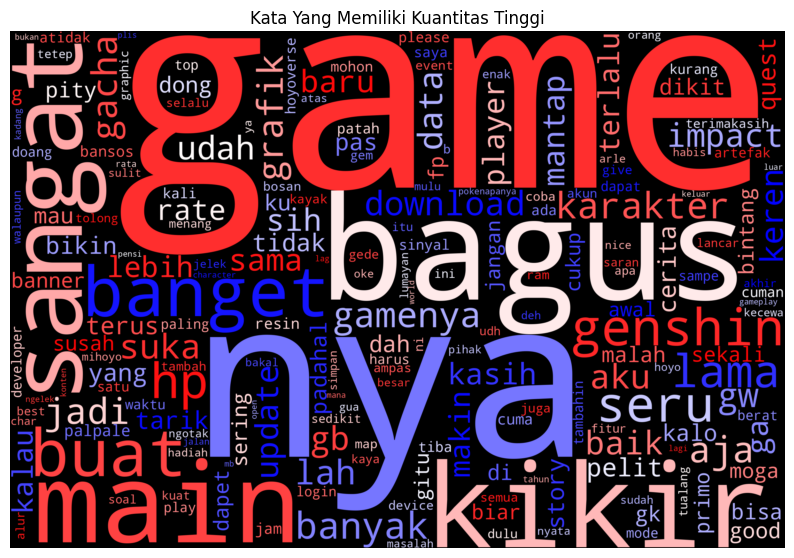

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


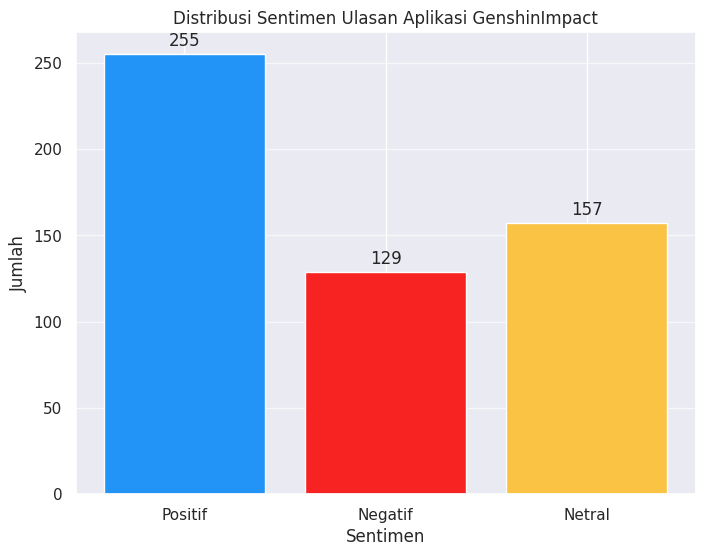

In [39]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GenshinImpact")


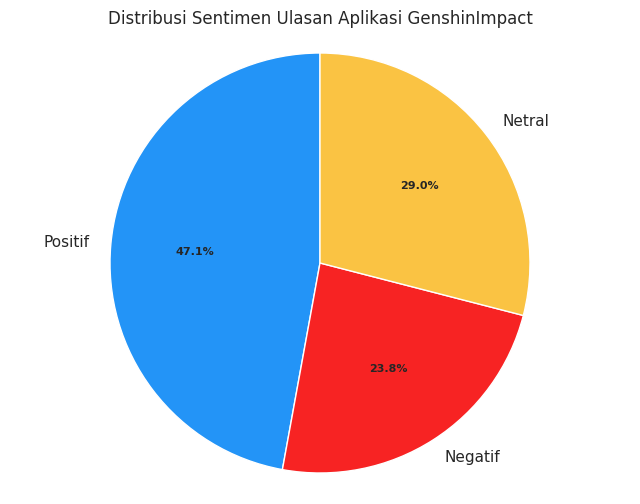

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GenshinImpact")

In [41]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,penuh tualang,full of levers,Positif
1,alur cerita nya tarik event sangat tarik sedik...,The plot of his story. Pull the event very sli...,Negatif
2,mantap,Steady.,Positif
3,gamenya tarik keren,The game's pulling. Cool.,Negatif
5,mantaaaap,That's great.,Positif
...,...,...,...
535,download aplikasi data game masa pas update su...,Download the program's data games in time for ...,Positif
536,maaf,Sorry.,Negatif
537,suka gamenya grafik hd carakter banyak pas awa...,Loves the game. A lot of hd Carakter graphs at...,Negatif
538,this game is pretty fun to play i cant wait wh...,this game is pretty fun to play i cant wait wh...,Positif


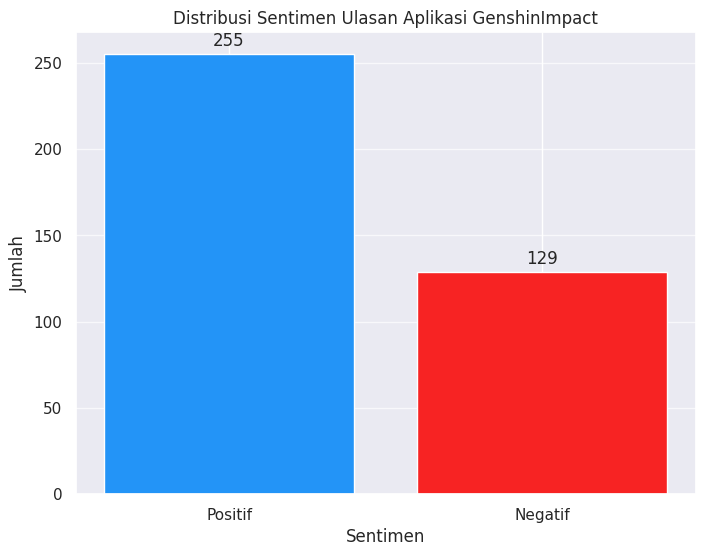

In [65]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GenshinImpact")


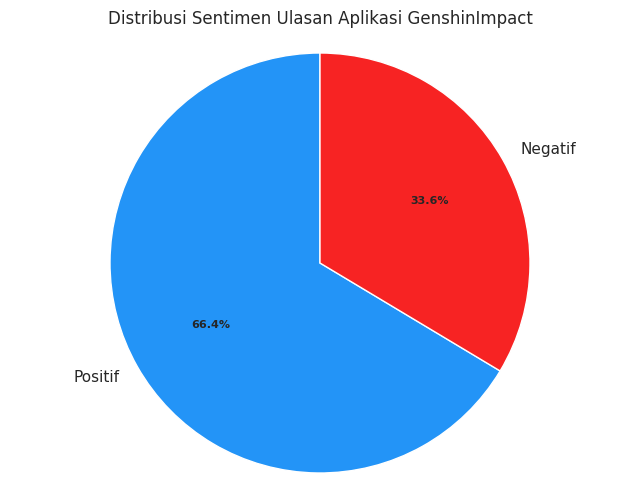

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GenshinImpact")

In [43]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,penuh tualang,full of levers,1
1,alur cerita nya tarik event sangat tarik sedik...,The plot of his story. Pull the event very sli...,0
2,mantap,Steady.,1
3,gamenya tarik keren,The game's pulling. Cool.,0
5,mantaaaap,That's great.,1
...,...,...,...
535,download aplikasi data game masa pas update su...,Download the program's data games in time for ...,1
536,maaf,Sorry.,0
537,suka gamenya grafik hd carakter banyak pas awa...,Loves the game. A lot of hd Carakter graphs at...,0
538,this game is pretty fun to play i cant wait wh...,this game is pretty fun to play i cant wait wh...,1


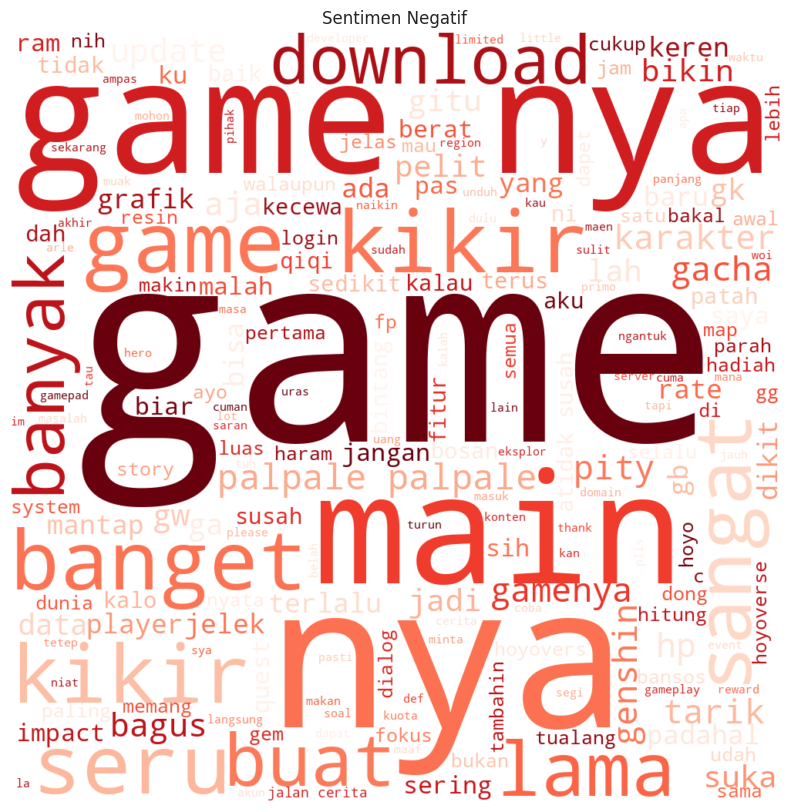

In [44]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

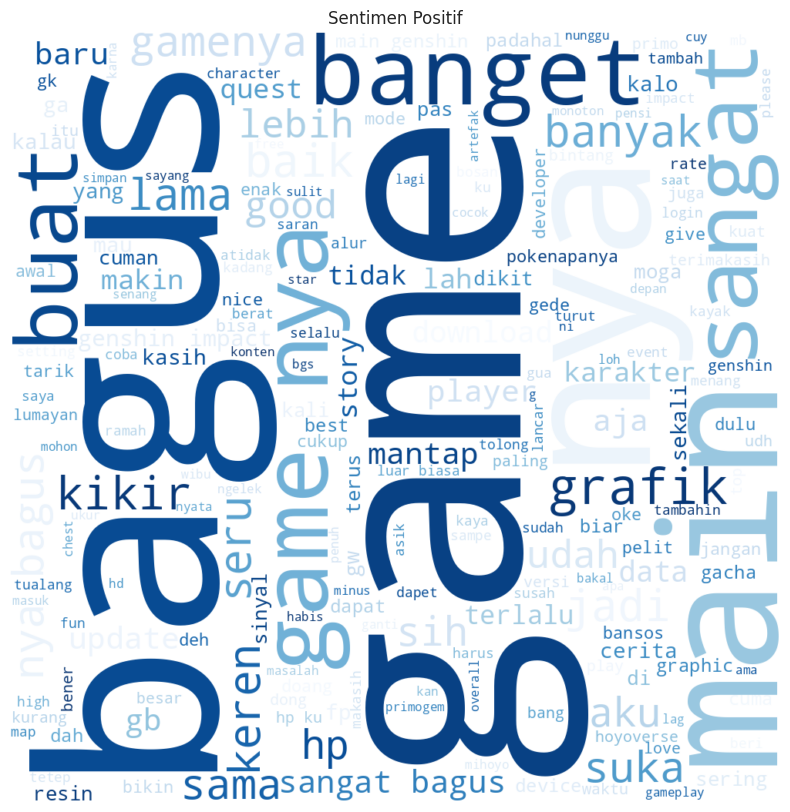

In [45]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [46]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    255
0    129
Name: count, dtype: int64

# **Data Preparation**

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

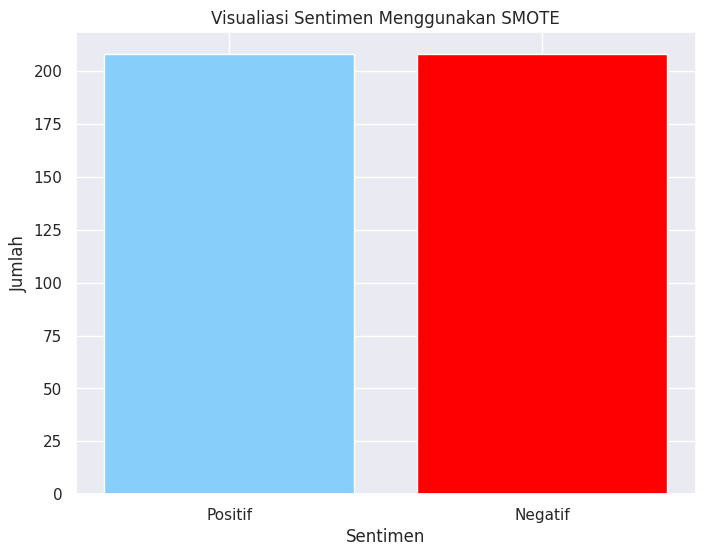

In [51]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [52]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [53]:
y_pred = naive_bayes.predict(X_test_vec)

In [54]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7272727272727273

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.67      0.60      0.63        30
     Positif       0.76      0.81      0.78        47

    accuracy                           0.73        77
   macro avg       0.71      0.70      0.71        77
weighted avg       0.72      0.73      0.72        77



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[18 12]
 [ 9 38]]

Accuracy =  0.7272727272727273


In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[18 12]
 [ 9 38]]

True Positives (TP) =  18

True Negatives (TN) =  38

False Positives (FP) =  12

False Negatives (FN) =  9

Accuracy =  0.7272727272727273


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

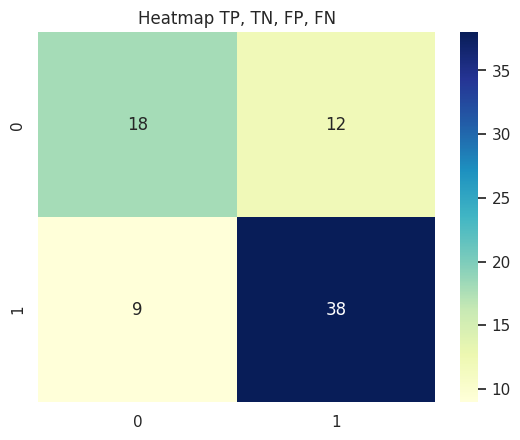

In [57]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [58]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [59]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7273


In [60]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2727


# **Testing**


In [61]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : game tolol , udh gitu kikir lagi
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [62]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus baget
Hasil Analisis Sentimen Untuk Teks Baru : Positif
